In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
iris = sns.load_dataset('iris')
penguins = sns.load_dataset('penguins')

In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


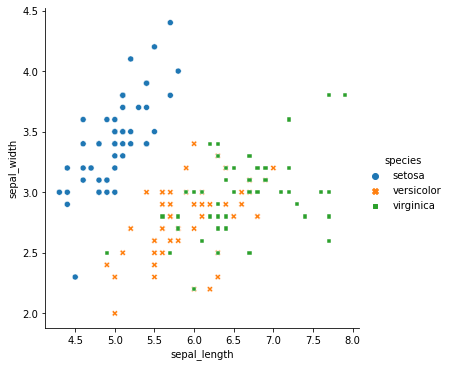

In [4]:
sns.relplot(data=iris,x='sepal_length',y='sepal_width',style='species',hue='species');

# hue identifies another variables with colours
# style also identifies a variable with the marker style

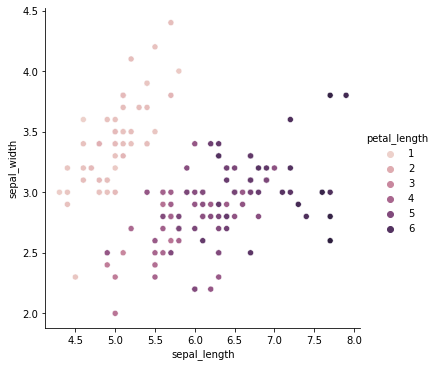

In [5]:
sns.relplot(data=iris,x='sepal_length',y='sepal_width',hue='petal_length');

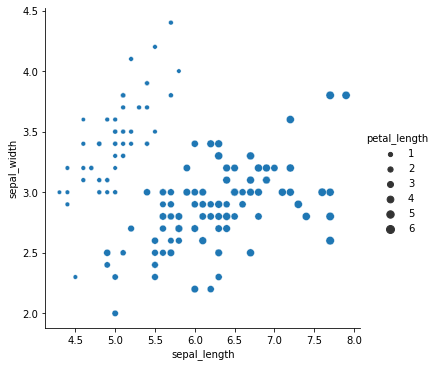

In [6]:
sns.relplot(data=iris,x='sepal_length',y='sepal_width',size='petal_length');

# size also acts like hue or style

## Joint graphs

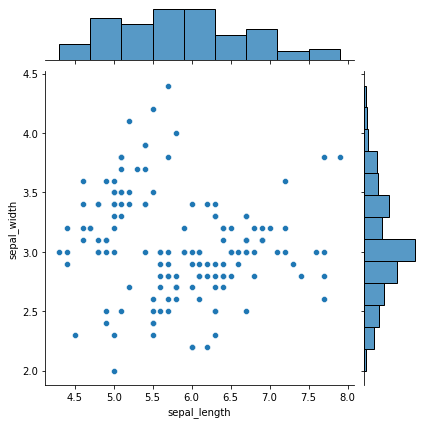

In [7]:
sns.jointplot(data=iris,x='sepal_length',y='sepal_width')

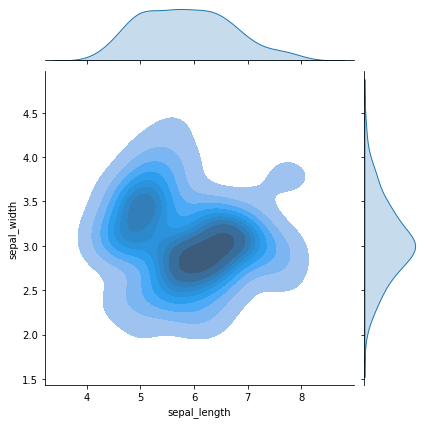

In [8]:
sns.jointplot(data=iris,x='sepal_length',y='sepal_width',kind='kde',fill=True)

# we can select the type of plot with kind=

# Joint Grid

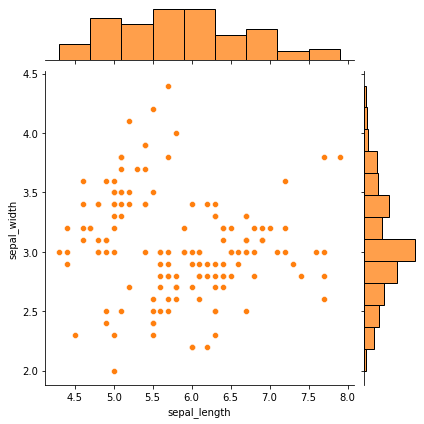

In [9]:
joint_func = sns.JointGrid(data=iris, x='sepal_length', y='sepal_width')

joint_func.plot(sns.scatterplot, sns.histplot, color='tab:orange')

# Histogram

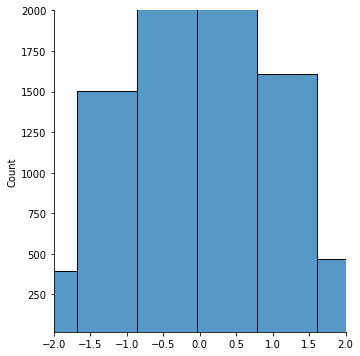

In [10]:
xs = np.random.normal(size=10000)

ax = sns.displot(xs, bins=10)

ax.set(xlim=(-2, 2)) # same as in matplotlib, we can select limits
ax.set(ylim=(20, 2000))

<AxesSubplot:ylabel='Probability'>

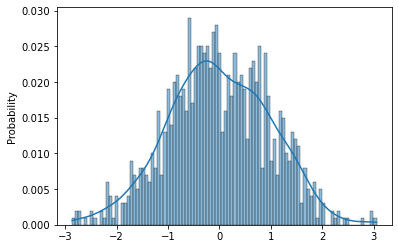

In [11]:
xs = np.random.normal(size=1000)
xe = np.random.exponential(size=1000)

#sns.displot(xs, bins=10)
sns.histplot(xs, bins=100, kde=True, stat='probability')

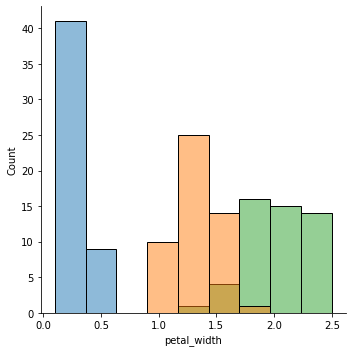

In [12]:
sns.displot(data=iris, x='petal_width', hue='species', legend=False)

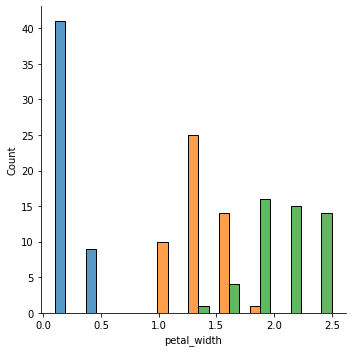

In [13]:
sns.displot(data=iris, x='petal_width', hue='species', legend=False, multiple='dodge')

# with 'multiple' param we can set if series collide

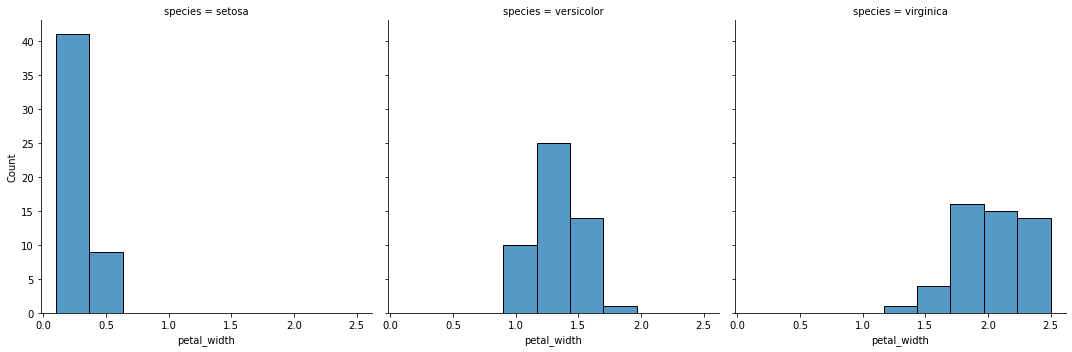

In [14]:
sns.displot(data=iris, x='petal_width', col='species', legend=False)

# with col argument we can divide the graph into columns depending on the variable

# Pairwise relationships

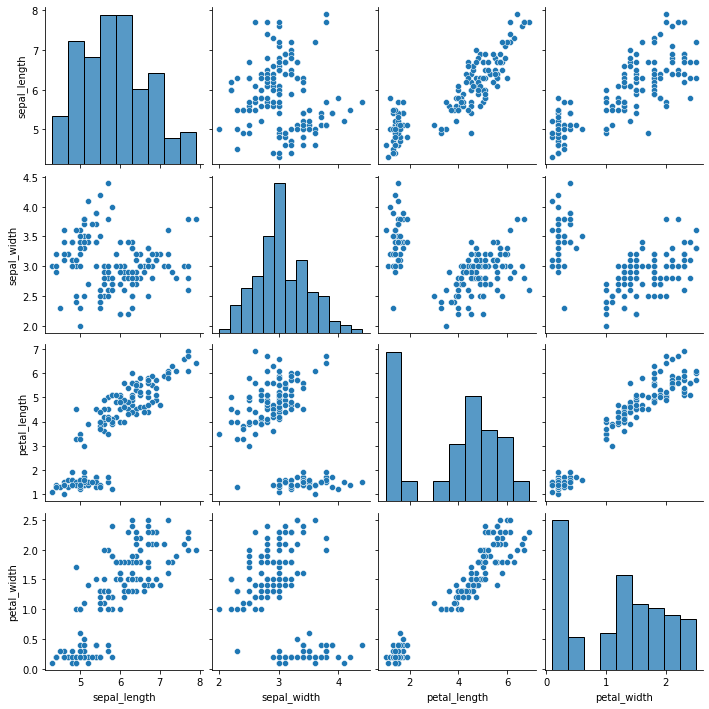

In [15]:
sns.pairplot(iris)

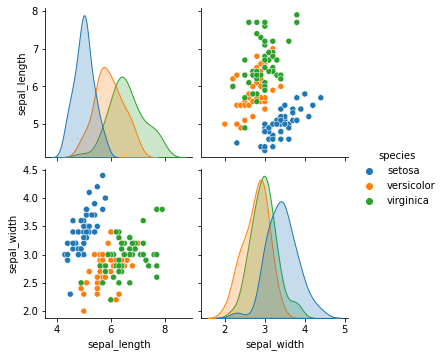

In [16]:
sns.pairplot(iris[['sepal_length', 'sepal_width', 'species']], diag_kind='kde', hue='species')

### Linear relationships

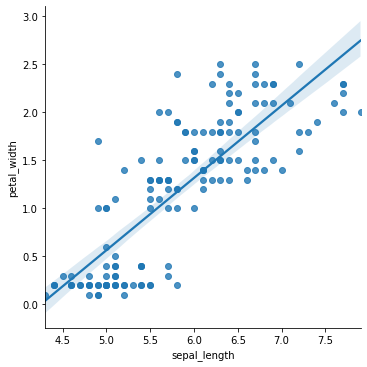

In [17]:
sns.lmplot(data=iris, x='sepal_length', y='petal_width')

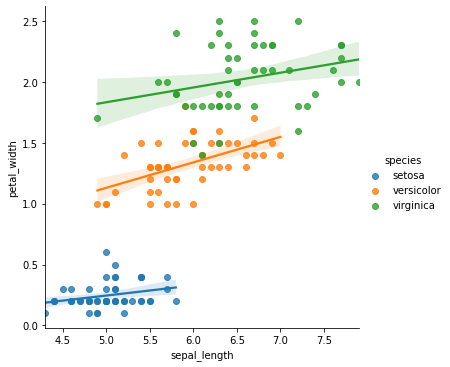

In [18]:
sns.lmplot(data=iris, x='sepal_length', y='petal_width', hue='species')

# Categorical Data

<AxesSubplot:xlabel='bill_length_mm', ylabel='species'>

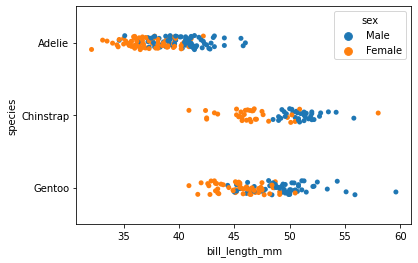

In [19]:
sns.stripplot(data = penguins, x= 'bill_length_mm', y = 'species', hue= 'sex')

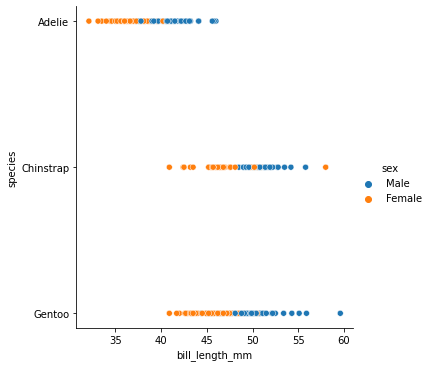

In [20]:
# with this kind of plt we dont see the big difference on length for chinstrap

sns.relplot(data = penguins, x= 'bill_length_mm', y = 'species', hue= 'sex')

<AxesSubplot:xlabel='bill_length_mm', ylabel='species'>

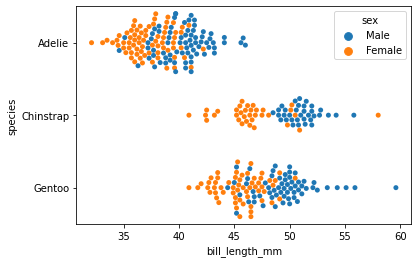

In [21]:
# good kind of plot for series with not much data

sns.swarmplot(data = penguins, x= 'bill_length_mm', y = 'species', hue= 'sex')

# Boxplot
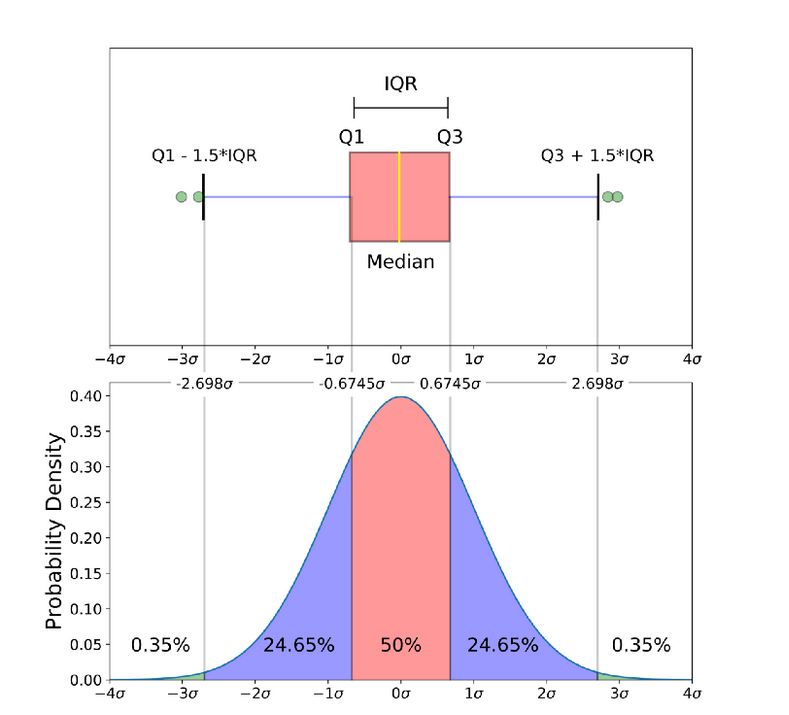


Boxes represent distributions
The main purpouse o this kind of plots is to compare distributions

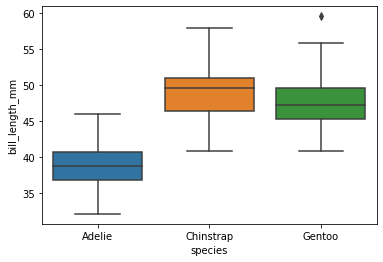

In [25]:
sns.boxplot(data=penguins, x='species', y='bill_length_mm')
plt.show()

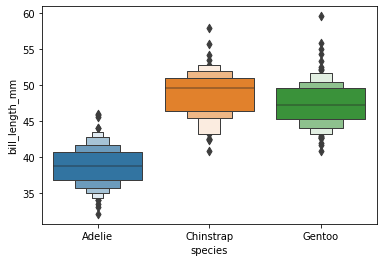

In [28]:
sns.boxenplot(data=penguins, x='species', y='bill_length_mm');

# boxenplot plots more quantiles

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

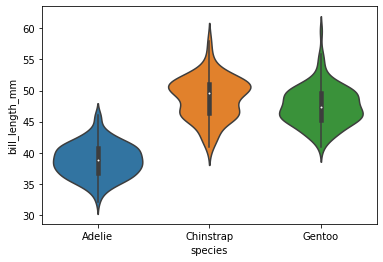

In [29]:
sns.violinplot(data=penguins.sort_index(), x='species', y='bill_length_mm')

### Ejercicio

Order by decreasing median

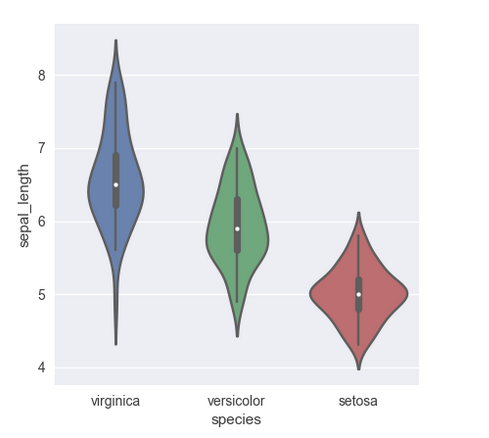

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

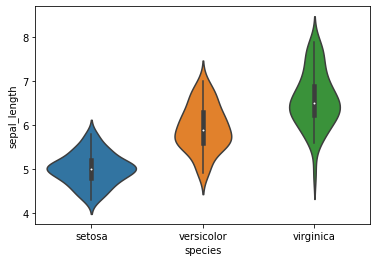

In [40]:
sns.violinplot(data=iris, x='species', y='sepal_length', by='sepal_length')

una forma

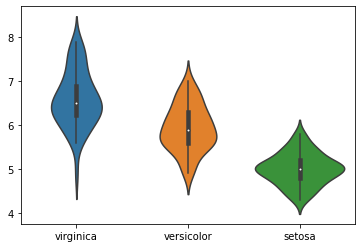

In [46]:
df = sns.load_dataset('iris')

grouped = df.groupby(['species'])

df2 = pd.DataFrame({col:vals['sepal_length'] for col,vals in grouped})

meds = df2.median()
meds.sort_values(ascending=False, inplace=True)
df2 = df2[meds.index]

sns.violinplot(data=df2)
plt.show()

otra forma

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

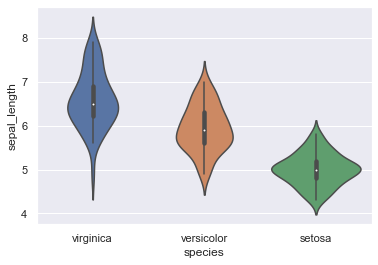

In [61]:
my_order = iris.groupby(by=['species'])['sepal_length'].median().iloc[::-1].index
sns.set_palette('deep')
sns.set_theme()
sns.violinplot(data=iris, x='species', y='sepal_length', order=my_order)


### Barplot

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

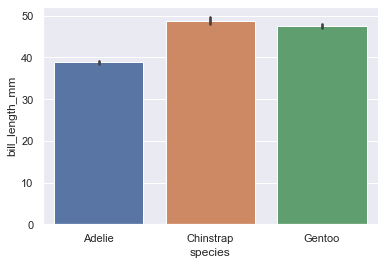

In [62]:
sns.barplot(data=penguins, x='species', y='bill_length_mm')

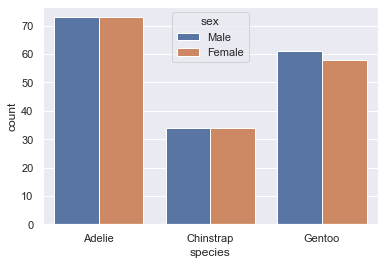

In [63]:
sns.countplot(data=penguins, x='species', hue='sex');

# Point plot
A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.



<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

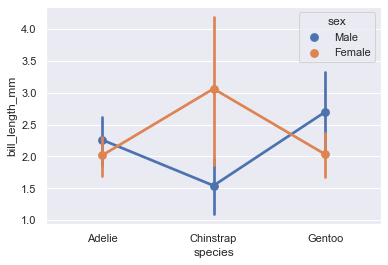

In [68]:
sns.pointplot(data=penguins, x='species', y='bill_length_mm', estimator=np.std, hue='sex')

### Heatmap

<AxesSubplot:>

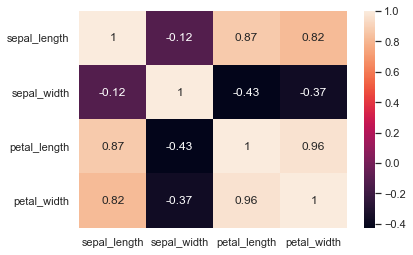

In [76]:
penguins.groupby(['species', 'island'])['flipper_length_mm'].mean()
sns.heatmap(data=iris.corr(), annot=True)

# cluster map

https://seaborn.pydata.org/generated/seaborn.clustermap.html#seaborn.clustermap

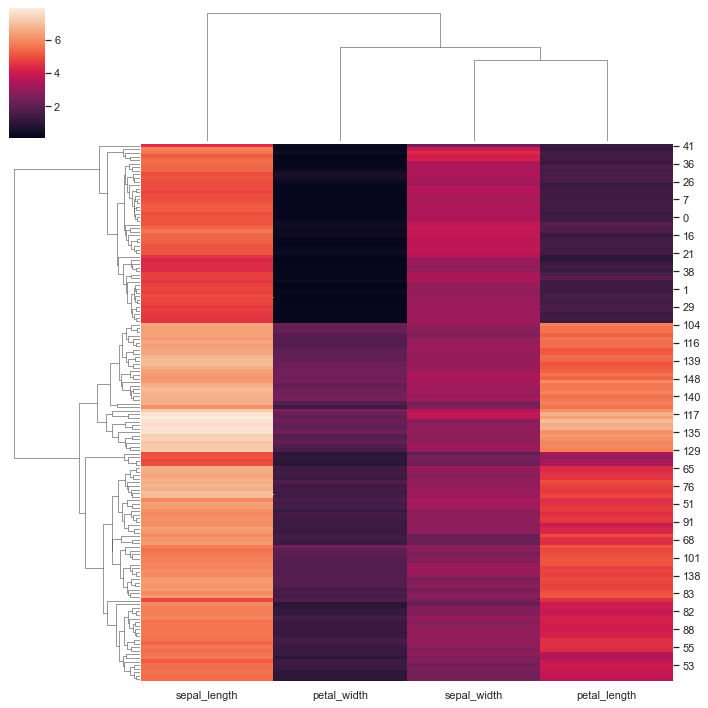

In [85]:
g = sns.clustermap(iris.drop('species',  axis=1))

# PANDAS

Pandas also has its own visualization API.

https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

<AxesSubplot:xlabel='petal_length'>

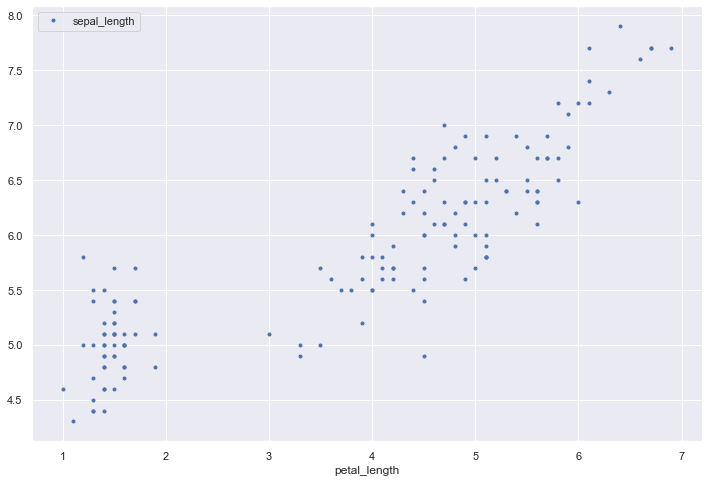

In [97]:
fig, ax = plt.subplots(figsize=(12, 8))
iris.plot(x='petal_length', y='sepal_length', linestyle='', marker='.', ax=ax)

#### Parallel coordinates plot
Parallel plot or Parallel Coordinates Plots allow to compare the feature of several individual observations on a set of numerical variables

<AxesSubplot:>

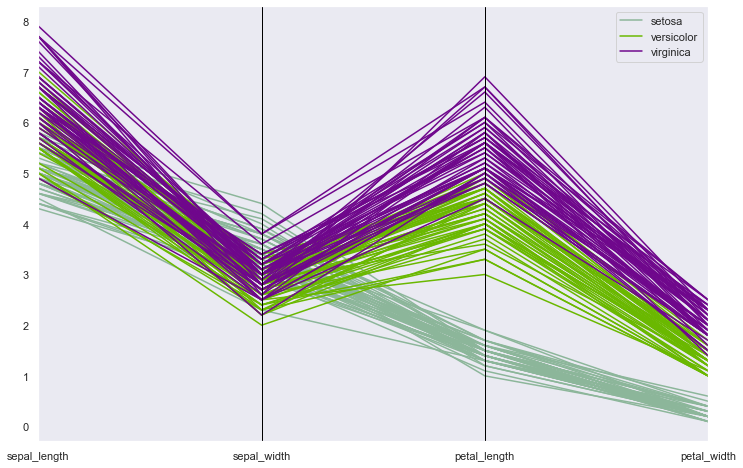

In [98]:
from pandas.plotting import parallel_coordinates

fig, ax = plt.subplots(figsize=(12, 8))

parallel_coordinates(frame=iris, class_column='species', ax=ax)


# te dibuja las lineas del dataset de forma grafica
# este tipo de grafica viene muy bien para comparar categorias

#### autocorrelation plots

Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

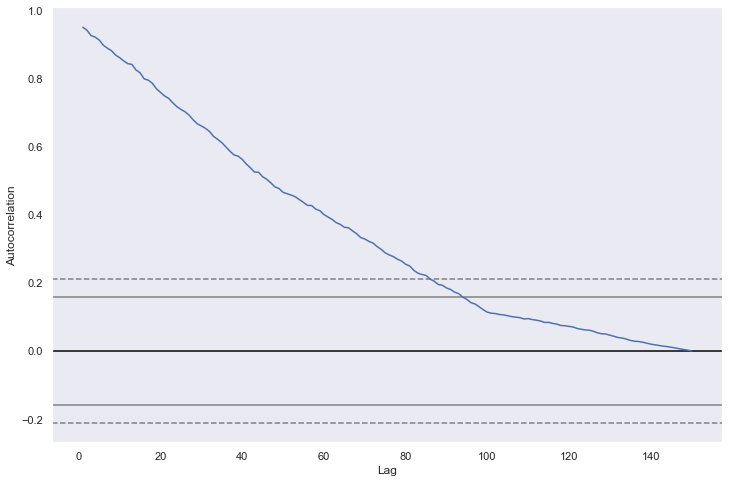

In [102]:
from pandas.plotting import autocorrelation_plot

fig, ax = plt.subplots(figsize=(12, 8))

autocorrelation_plot(series=iris.drop('species',  axis=1), ax=ax)